In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date']

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
1253   2016-12-23
1254   2016-12-27
1255   2016-12-28
1256   2016-12-29
1257   2016-12-30
Name: Date, Length: 1258, dtype: datetime64[ns]

In [ ]:
train_set = df.iloc[:,1:2].values

In [ ]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
train_set = scaler.fit_transform(train_set)
train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
train_set.shape

(1258, 1)

In [ ]:
np.min(train_set)

0.0

In [ ]:
np.max(train_set)

1.0

In [ ]:
dates = df['Date'].values

In [ ]:
type(dates[0])

numpy.datetime64

In [ ]:
X_train = []
Y_train = []

for i in range(60,1258):
  set_x_i = train_set[i-60:i,0]
  set_y_i = train_set[i,0]
  X_train.append(set_x_i)
  Y_train.append(set_y_i)

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
np.shape(X_train)

(1198, 60)

In [ ]:
np.shape(Y_train)

(1198,)

In [ ]:
input_shape = (X_train.shape[1],1) #number of samples, number of timesteps, number of features observed in each time step

In [ ]:
print(input_shape)

(60, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

In [ ]:
model.add(LSTM(50, input_shape = input_shape, return_sequences=True))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
X_train.shape

(1198, 60)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 6s 12ms/step - loss: 0.1177 - accuracy: 6.4596e-04
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0086 - accuracy: 0.0011
Epoch 3/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0071 - accuracy: 0.0012
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0062 - accuracy: 7.6172e-04
Epoch 5/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0058 - accuracy: 0.0020
Epoch 6/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0057 - accuracy: 0.0012
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0055 - accuracy: 8.1016e-04
Epoch 8/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0040 - accuracy: 7.0855e-04
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0042 - accuracy: 0.0013
Epoch 10/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0047 - 

In [ ]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
Y_real = df_test.iloc[:,1:2]

In [ ]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
df_total = pd.concat((df['Open'],df_test['Open']),axis =0)

In [ ]:
type(df_total)

pandas.core.series.Series

In [ ]:
inputs = df_total[len(df_total) - len(df_test) - 60:].values

In [ ]:
inputs.shape

(80,)

In [ ]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

(80, 1)


In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
inputs[0:10]

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685]])

In [ ]:
inputs.shape

(80, 1)

In [ ]:
X_test = []

for i in range(60,80):
  set_x_test_i = inputs[i-60:i,0]
  X_test.append(set_x_test_i)
X_test = np.array(X_test)

In [ ]:
X_test.shape

(20, 60)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
Y_test = model.predict(X_test)

In [ ]:
Y_test

array([[0.9350954 ],
       [0.9299618 ],
       [0.9305382 ],
       [0.93326116],
       [0.93967986],
       [0.9506265 ],
       [0.9605355 ],
       [0.9646826 ],
       [0.96521795],
       [0.9643725 ],
       [0.9633992 ],
       [0.96245897],
       [0.96175885],
       [0.96239483],
       [0.96384823],
       [0.9718566 ],
       [0.9839598 ],
       [0.99705625],
       [1.0044214 ],
       [0.99746346]], dtype=float32)

In [ ]:
Y_test = scaler.inverse_transform(Y_test)

In [ ]:
Y_test

array([[781.78986],
       [779.0302 ],
       [779.3401 ],
       [780.80383],
       [784.2543 ],
       [790.13873],
       [795.46545],
       [797.69476],
       [797.98254],
       [797.5281 ],
       [797.0048 ],
       [796.4994 ],
       [796.12305],
       [796.46497],
       [797.2462 ],
       [801.5512 ],
       [808.0574 ],
       [815.09753],
       [819.0567 ],
       [815.3164 ]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

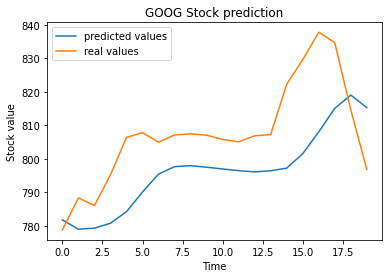

In [ ]:
plt.plot(Y_test, label = 'predicted values')
plt.plot(Y_real, label = 'real values')
plt.title('GOOG Stock prediction')
plt.xlabel('Time')
plt.ylabel('Stock value')
plt.legend()
plt.show()